<a href="https://colab.research.google.com/github/soleildeminuit/AI-Samhallsplanering-Course/blob/main/scripts/AI_Samhallsplanering_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip Install Packages

In [2]:
!pip install rasterio
!pip install geopandas
!pip install requests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 38.8 MB/s eta 0:00:00


# Hämta geodata

***Här är den första textcellen***

In [ ]:
import requests
import zipfile
import io
import os

# Lista med URLs för de filer som ska laddas ner
urls = [
    "https://www.scb.se/contentassets/3443fea3fa6640f7a57ea15d9a372d33/shape_svenska_220223.zip",
    "https://www.scb.se/contentassets/923c3627a8a042a5b9215e8ff3bde0a3/deso_2018_2021-10-21.zip",
    "https://www.scb.se/contentassets/e3b2f06da62046ba93ff58af1b845c7e/regso_2018_v2.zip"
]

# Skapa katalogen för att spara nerladdade filer
os.makedirs('/content/sample_data/geodata', exist_ok=True)

for url in urls:
    response = requests.get(url)

    # Extrahera ZIP-filen
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        zip_file.extractall('/content/sample_data/geodata')

        # Extrahera alla inre ZIP-filer
        for file in zip_file.namelist():
            if file.endswith('.zip'):
                with zipfile.ZipFile(io.BytesIO(zip_file.read(file))) as inner_zip_file:
                    inner_zip_file.extractall('/content/sample_data/geodata')


--2023-11-24 14:19:11--  https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shp
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/soleildeminuit/AI-Samhallsplanering-Course/main/data/raw/Kommun_Sweref99TM_region.shp [following]
--2023-11-24 14:19:12--  https://raw.githubusercontent.com/soleildeminuit/AI-Samhallsplanering-Course/main/data/raw/Kommun_Sweref99TM_region.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172404 (168K) [application/octet-stream]
Saving to: ‘Kommun_Sweref99TM_region.shp.3’

Kommun_Sweref99TM_r 100%[==================

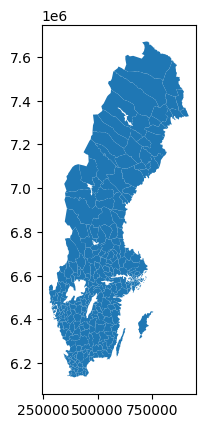

In [ ]:
# !pip install geopandas
# !pip install descartes
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Ladda ner shape-filen
# !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shp

# # Läs in shape-filen
# try:
#     shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")
# except ValueError:
#     # Ladda ner filerna som saknas
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.cpg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.dbf
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.prj
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shx
#     #
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.cpg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.dbf
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.prj
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.shx
#     #
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/DeSO_2018_v2.gpkg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/RegSO_2018_v2.gpkg

#     shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")

# # Rita kartan
# shapefile.plot()
# plt.show()


# Hämta rasterdata

In [7]:
import requests
from io import BytesIO
import rasterio
import geopandas as gpd

# Lista med filnamn i katalogen
filnamn_lista = ["Stockholm_2017_2022.tif",
                 "Forskolor_ht23_sweref.gpkg",
                 "tradtackning_binar3m_Örebro.tif"]  # Uppdatera med faktiska filnamn

# Bas-URL för GitHub-repot
base_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/'

for filnamn in filnamn_lista:
    url = base_url + filnamn

    # Ladda ner filen
    response = requests.get(url)
    response.raise_for_status()

    # Spara filen lokalt i Colab
    file_path = f'/content/sample_data/{filnamn}'
    with open(file_path, 'wb') as file:
        file.write(response.content)

    # Kontrollera filtyp och läs in data därefter
    if filnamn.endswith('.tif'):
        # Läs in rasterdata (GeoTIFF) med rasterio
        with rasterio.open(file_path) as src:
            raster_data = src.read(1)
            # Hantera rasterdata här...

    elif filnamn.endswith('.gpkg'):
        # Läs in vektordata (GeoPackage) med geopandas
        vector_data = gpd.read_file(file_path)
        # Hantera vektordata här...

    else:
        print(f'Filformat för {filnamn} stöds inte.')


<ipython-input-28-2d04af81634a>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))


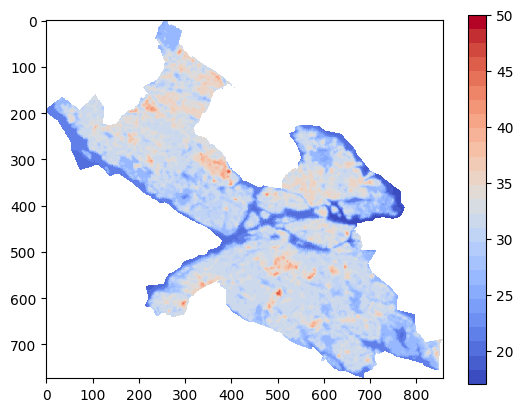

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:data = src.read(1)

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan baserat på de faktiska värdena i datafilen
vmin = np.nanmin(data)
vmax = 50

# Skapa en lista med färgkoder
cmap_custom = ["#436db0", "#5082bb", "#6095c5", "#71a9cf", "#83b9d8", "#97c9e0", "#aad8e9", "#bde2ee", "#cfebf3", "#e1f3f6", "#ecf8e2", "#f7fcce", "#fffcbb", "#fff1aa", "#fee79a", "#fed989", "#fec779", "#fdb668", "#fba15b", "#f88b51", "#f57446", "#e34932", "#d93328", "#c82227", "#b71126", "#a50026"]

# Använd färgkartan
cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))

# Plotta marktemperaturerna med anpassad färgsättning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()



# Värmekarta

<ipython-input-7-103deb662113>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 256)


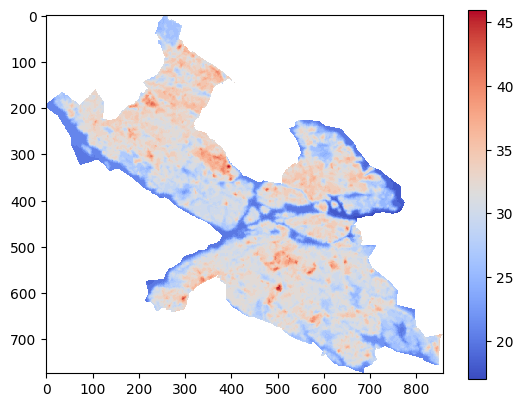

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan baserat på de faktiska värdena i datafilen
vmin = np.nanmin(data)
vmax = np.nanmax(data)
cmap = plt.cm.get_cmap('coolwarm', 256)

# Plotta marktemperaturerna med anpassad färgsättning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()

#Självklart! Här är en fullständig prompt som du kan använda för att återskapa kartan:

#Ladda in GeoTIFF-datafilen med hjälp av rasterio.
#Använd numpy för att konvertera icke-värden till NaN.
#Definiera färgskalan baserat på de faktiska värdena i datafilen.
#Använd matplotlib för att plotta marktemperaturerna med den anpassade färgsättningen.


För att skapa ovanstående Pythonkod behöver du en prompt som beskriver följande steg:

1. **Ladda Geospatial Data från en GeoTIFF-fil:**
   - Starta med att ladda geospatial data för Stockholm från en GeoTIFF-fil som täcker åren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Behandla områden i datan där information saknas (NoData-värden) genom att ersätta dessa med 'NaN' (Not a Number) för att undvika felaktig tolkning av datan.

3. **Ställ in Färgskalan för Värmekartan:**
   - Bestäm den lägsta värdet i datan (som inte är 'NaN') för att använda som minsta värde på färgskalan.
   - Sätt ett maximalt värde för färgskalan, exempelvis 50.

4. **Skapa en Anpassad Färgkarta:**
   - Definiera en lista av färgkoder som ska användas för att visualisera olika värden i datan. Denna lista bör innehålla en serie av färgkoder i hexadecimal format.

5. **Använd en Inbyggd Färgkarta för Plottning:**
   - Använd en inbyggd färgkarta (till exempel 'coolwarm') och justera den efter antalet färger i den anpassade färgkartan.

6. **Plotta Värmekartan:**
   - Visa datan som en värmekarta med den anpassade färgsättningen. Använd de definierade minsta och största värdena för färgskalan och tillämpa en interpolering för att jämna ut övergångarna mellan färger.

7. **Visa en Färgskala och Plotten:**
   - Inkludera en färgskala som visar hur olika färger korrelerar med datans värden.
   - Visa den slutliga plotten.

Den här prompten beskriver processen för att skapa en värmekarta av geospatial data med anpassad färgsättning, där datan laddas från en GeoTIFF-fil och NoData-värden hanteras korrekt. Prompten fokuserar på att visualisera data med specifik färgsättning och inkluderar inte behandling av ytterligare datakällor eller komplexa geospatiala analyser.

# Värmekarta med förskolor


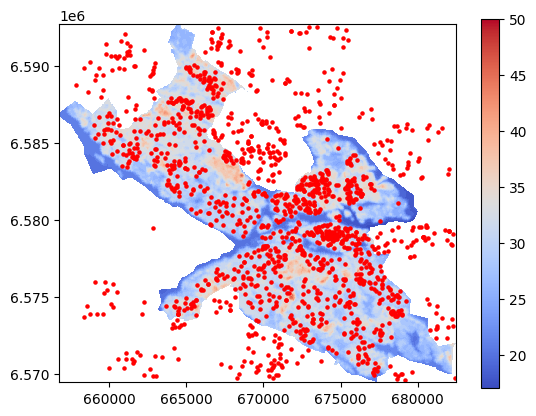

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)
    left, bottom, right, top = src.bounds

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan
vmin = np.nanmin(data)
vmax = 50

# Plotta marktemperaturerna med inbyggd färgkarta
fig, ax = plt.subplots()
img = ax.imshow(data, cmap='coolwarm', vmin=vmin, vmax=vmax, interpolation='nearest', extent=[left, right, bottom, top])
fig.colorbar(img)

# Ladda in GeoPackage-data
fp = '/content/sample_data/Forskolor_ht23_sweref.gpkg'
data = gpd.read_file(fp)

# Skapa en GeoDataFrame med bounding box
bbox = gpd.GeoDataFrame(geometry=[box(left, bottom, right, top)], crs=data.crs)

# Gör en spatial join
data_within_bbox = gpd.sjoin(data, bbox, predicate='within')

# Plotta förskolorna med samma axel
data_within_bbox.plot(ax=ax, color='red', markersize=5)

# Visa plotten
plt.show()

# Kontrollera att det finns data att plotta
if data.size > 0:
  # Spara figuren som en pdf
  fig.savefig('karta.pdf', format='pdf')
else:
  print('Inga data att plotta.')


Absolut, prompten kan formuleras på ett sätt som beskriver processen utan att gå in på detaljer om specifika programmeringsbibliotek. Här är en förenklad, icke-teknisk beskrivning:

1. **Öppna och Läs en Satellitkarta över Stockholm:**
   - Börja med att öppna en satellitkarta över Stockholm från en fil. Denna karta visar geografiska data från åren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Om det finns några områden på kartan där data saknas, se till att dessa områden inte inkluderas i vidare analys.

3. **Skapa en Värmekarta:**
   - Använd kartan för att skapa en värmekarta som visar olika temperaturer eller andra relevanta mätvärden över Stockholm. Välj färger som tydligt visar variationer i datan.

4. **Ladda Punkter för Förskolor:**
   - Ladda in en annan fil som innehåller information om positioner för förskolor i Stockholm.

5. **Anpassa Förskolepositionerna till Kartan:**
   - Justera informationen om förskolor så att den endast visar de som ligger inom det område som din satellitkarta täcker.

6. **Kombinera Värmekartan med Förskolepositionerna:**
   - Lägg till markörer för förskolorna på din värmekarta. Dessa bör vara tydligt synliga och skilja sig i färg från värmekartan.

7. **Visa den Färdiga Kartan:**
   - När värmekartan och förskolepositionerna har kombinerats, visa den slutgiltiga kartan. Denna karta ska nu illustrera både geografiska data från satellitbilden och placeringen av förskolor i Stockholm.

Denna beskrivning ger en översikt över processen för att skapa en kombinerad karta med både satellitdata och punktdata för förskolor, utan att gå in på programmeringsdetaljer. Det gör det lättare för en icke-programmerare att förstå och beskriva processen.

# Trädtäckningsdata (Boverket)
https://www.boverket.se/sv/om-boverket/publicerat-av-boverket/nyheter/tradtackning/

Hämta data:

https://www.boverket.se/sv/samhallsplanering/sa-planeras-sverige/planeringsfragor/ekosystemtjanster/tradtackning/

---
Träd i den byggda miljön har stor betydelse för många ekosystemtjänster och för klimatanpassning av städer och tätorter. Träd bidrar till att sänka temperaturer varma dagar och tar hand om dagvatten. Boverket har därför tillsammans med Metria gjort en nationell kartläggning av trädtäckning i städer och tätorter som kan användas av kommuner, länsstyrelser, företag och myndigheter.

## Filinformation

In [ ]:
import pandas as pd

file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'

# Läs in filen
xl = pd.ExcelFile(file_path)

# Skriv ut alla flikar och deras kolumner
for sheet_name in xl.sheet_names:
    print(f"Flik: {sheet_name}")
    df = xl.parse(sheet_name)
    print(f"Kolumner: {df.columns.tolist()}\n")

# skriv pythonkod för att läsa filen file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx' och analysera vilka flikar som finns och respektive fliks kolumner. Filens dokumentation finner du nedan###Statistik över trädtäckning
# För att kunna få en nationell bild över trädtäckningen i tätorter har Boverket låtit ta fram trädtäckningsstatistik. Statistiken återfinns i Exceldokumentet nedan och omfattar för de berörda tätorterna följande information:

# Trädtäckningen inom tätortsgränsen, (Flik tradtackning_tatorter)
# Trädtäckning för tätortsnära gräns med en buffertzon om 1 kilometer (fliken tradtackning_tatorter_buff1000).
# Trädtäckning i varje stadsdel eller demografiskt statistikområde (DeSo) inom tätortsgräns (Fliken DeSO_2018_v2_urval_tradtackning) innehåller information om för hela DeSOn inom omfattade tätortsnära gräns med buffertzon 1 kilometer.
# I varje flik finns ett antal kolumner.

# Kolumn Tätort area [ha] visar den totala arealen i hektar för området. Kolumn Trädtäckning area [ha] visar den totala trädtäckningen i hektar för aktuellt område.
# Kolumn Trädtäckning andel visar den procentuella trädtäckningen (areal i kvadratmeter).
# Kolumn Trädtäckning area [kvm] visar total trädtäckning i kvadratmeter för området.
# Kolumn Trädtäckning procent [%] visar den procentuella trädtäckningen.


Flik: tradtackning_tatorter
Kolumner: ['TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

Flik: tradtackning_tatorter_buff1000 
Kolumner: ['OID_', 'TARGET_FID', 'TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

Flik: DeSO_2018_v2_urval_tradtackning
Kolumner: ['deso', 'kommun', 'lan', 'kommunnamn', 'lannamn', 'version', 'DeSO area [kvm]', 'Trädtäckning area [kvm]', 'Trädtäckning procent [%]']



In [ ]:
import pandas as pd

# Ladda in Excelfilen för att analysera dess innehåll
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
excel_data = pd.ExcelFile(file_path)

# Visa namnen på flikarna i Excelfilen
sheet_names = excel_data.sheet_names

# Läsa in datan från varje flik för att få en överblick
tradtackning_tatorter_df = pd.read_excel(excel_data, sheet_name='tradtackning_tatorter')
tradtackning_tatorter_buff1000_df = pd.read_excel(excel_data, sheet_name='tradtackning_tatorter_buff1000 ')
deso_2018_df = pd.read_excel(excel_data, sheet_name='DeSO_2018_v2_urval_tradtackning')



## Analys av Trädtäckningsgrad per Tätort i Göteborgs kommun

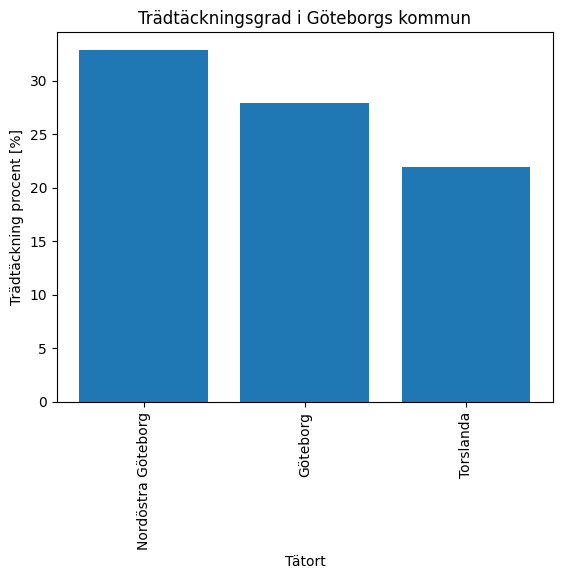

In [ ]:
# För att skapa ett diagram över trädtäckningsgrad i alla stadsdelar i Göteborgs kommun från fliken ‘tradtackning_tatorter’ kan du använda följande Python-kod:

# Python
# AI-genererad kod. Granska och använd noggrant. Mer information om vanliga frågor och svar.

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'

# Läs in filen
xl = pd.ExcelFile(file_path)

# Läs in datan från fliken 'tradtackning_tatorter'
df = xl.parse('tradtackning_tatorter')

# Skapa en ny DataFrame med endast data från Göteborgs kommun
gbg_df = df[df['KOMMUNNAMN'] == 'Göteborg']

# Skapa stapeldiagram
plt.bar(gbg_df['TATORT'], gbg_df['Trädtäckning procent [%]'])
plt.title("Trädtäckningsgrad i Göteborgs kommun")
plt.xlabel("Tätort")
plt.ylabel("Trädtäckning procent [%]")
plt.xticks(rotation=90)
plt.show()
# För att skapa diagrammet använder vi biblioteken pandas och matplotlib. Vi läser in Excelfilen på den angivna URL:en och läser sedan in datan från fliken ‘tradtackning_tatorter’. Vi skapar sedan en ny DataFrame med endast data från Göteborgs kommun genom att filtrera på kolumnen KOMMUNNAMN. Vi skapar sedan ett stapeldiagram som visar trädtäckningsgraden i varje tätort i Göteborgs kommun. Diagrammet visas i ett separat fönster.
# Hoppas detta hjälper!
# Jag ger dig utdata från ditt skript, nedan.
# Skapa Pythonskript som använder dessa data för att skapa ett diagram över trädtäckningsgrad i alla stadsdelar i Göteborgs kommun
# Använd bara fliken 'tradtackning_tatorter'
# ###Flik: tradtackning_tatorter
# Kolumner: ['TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

# Flik: tradtackning_tatorter_buff1000
# Kolumner: ['OID_', 'TARGET_FID', 'TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Trädtäckning area [ha]', 'Tätort area [ha]', 'Trädtäckning procent [%]']

# Flik: DeSO_2018_v2_urval_tradtackning
# Kolumner: ['deso', 'kommun', 'lan', 'kommunnamn', 'lannamn', 'version', 'DeSO area [kvm]', 'Trädtäckning area [kvm]', 'Trädtäckning procent [%]']


## Analys av Trädtäckningsgrad per Deso i Göteborgs kommun

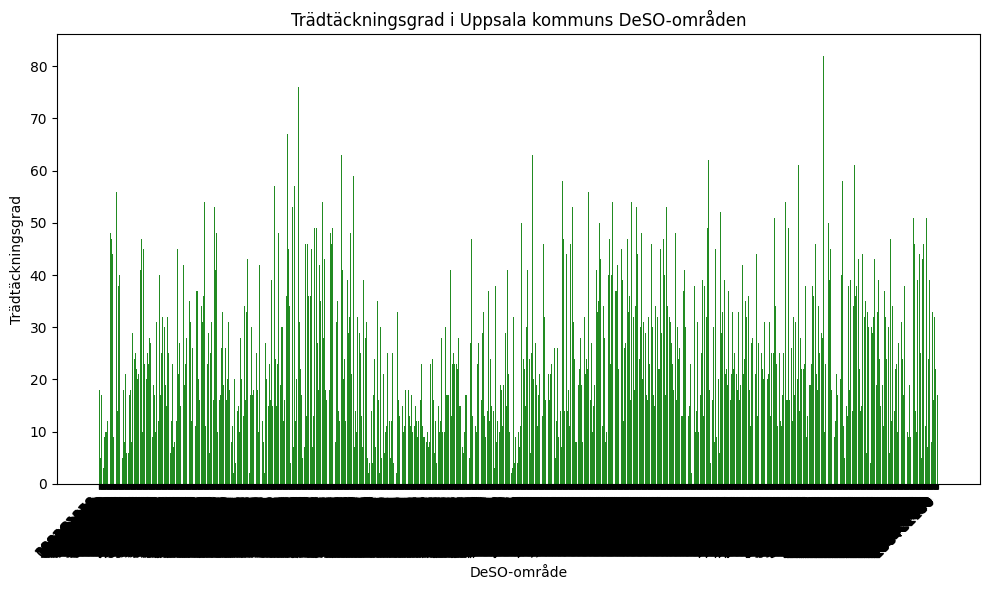

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data för Uppsala kommuns DeSO-områden
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Skapa ett stapeldiagram för trädtäckningsgraden
plt.figure(figsize=(10, 6))
plt.bar(uppsala_deso_df['deso'], uppsala_deso_df['Trädtäckning procent [%]'], color='forestgreen')
plt.xlabel('DeSO-område')
plt.ylabel('Trädtäckningsgrad')
plt.title('Trädtäckningsgrad i Uppsala kommuns DeSO-områden')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Visa diagrammet
plt.show()


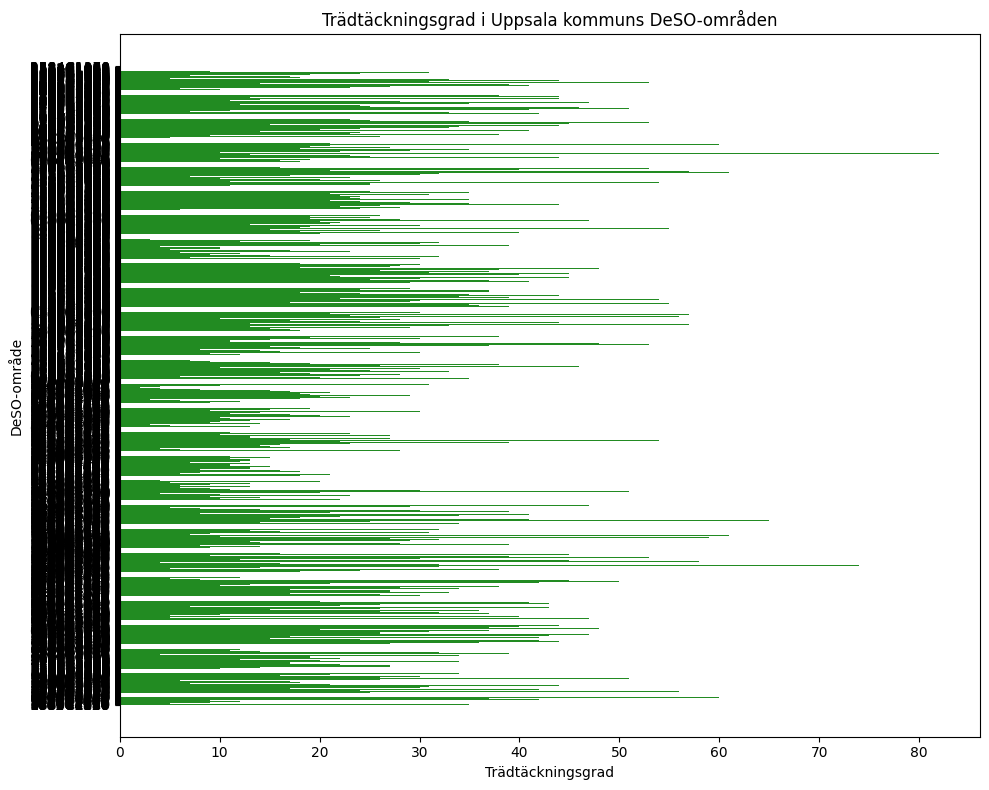

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data för Uppsala kommuns DeSO-områden
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Skapa ett horisontellt stapeldiagram för trädtäckningsgraden
plt.figure(figsize=(10, 8))
plt.barh(uppsala_deso_df['deso'], uppsala_deso_df['Trädtäckning procent [%]'], color='forestgreen')
plt.xlabel('Trädtäckningsgrad')
plt.ylabel('DeSO-område')
plt.title('Trädtäckningsgrad i Uppsala kommuns DeSO-områden')
plt.tight_layout()

# Visa diagrammet
plt.show()
# Oj, det blev väldigt många områden längs x-axeln, texterna blev ihoptryckta.
# Har du ett förslag på en bättre form av visualisering av många områden?
# Genererar svar åt dig…

# Absolut! Om vi har många områden längs x-axeln kan det vara svårt att läsa texten tydligt. Ett alternativ är att använda en horisontell stapeldiagram där varje stapel representerar ett DeSO-område. Låt mig uppdatera koden för att skapa en sådan visualisering:

### Ranking av Trädtäckningsgrad per Tätort i Göteborgs kommun

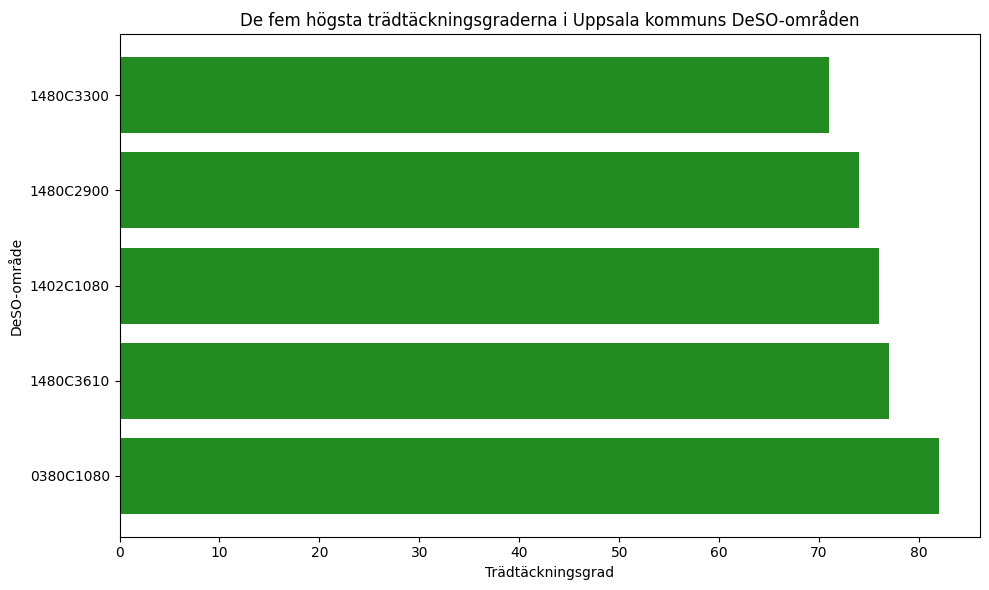

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data för Uppsala kommuns DeSO-områden
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Sortera områden efter trädtäckningsgrad och välj de fem högsta
top_5_deso_df = uppsala_deso_df.nlargest(5, 'Trädtäckning procent [%]')

# Skapa ett horisontellt stapeldiagram för de fem högsta trädtäckningsgraderna
plt.figure(figsize=(10, 6))
plt.barh(top_5_deso_df['deso'], top_5_deso_df['Trädtäckning procent [%]'], color='forestgreen')
plt.xlabel('Trädtäckningsgrad')
plt.ylabel('DeSO-område')
plt.title('De fem högsta trädtäckningsgraderna i Uppsala kommuns DeSO-områden')
plt.tight_layout()

# Visa diagrammet
plt.show()

# Välj bara de fem områdena med störst täckningsgrad
# Genererar svar åt dig…

# Självklart! Låt oss begränsa visualiseringen till de fem områden med högst trädtäckningsgrad. Här är den uppdaterade koden:

# Nu bör vi ha en tydlig visualisering som visar de fem områdena
# med högst trädtäckningsgrad. 🌳📊


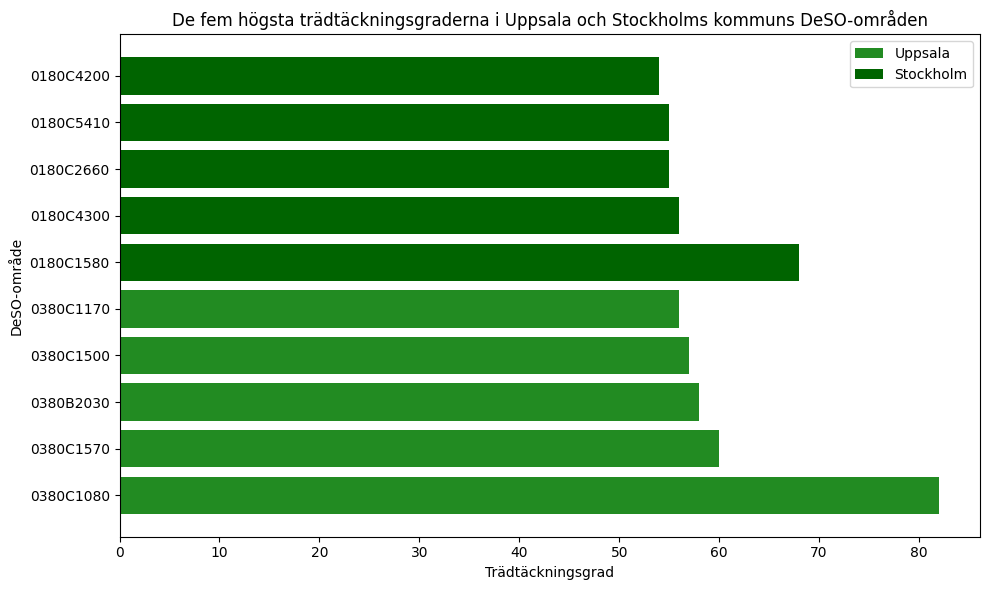

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in Excelfilen från den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Filtrera fram data för Uppsala kommun
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning'].query('kommunnamn == "Uppsala"')

# Sortera områden efter trädtäckningsgrad och välj de fem högsta
top_5_uppsala_deso_df = uppsala_deso_df.nlargest(5, 'Trädtäckning procent [%]')

# Filtrera fram data för Stockholms kommun
stockholm_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning'].query('kommunnamn == "Stockholm"')

# Sortera områden efter trädtäckningsgrad och välj de fem högsta
top_5_stockholm_deso_df = stockholm_deso_df.nlargest(5, 'Trädtäckning procent [%]')

# Skapa ett gemensamt stapeldiagram för de två kommunerna
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_5_uppsala_deso_df['deso'], top_5_uppsala_deso_df['Trädtäckning procent [%]'], color='forestgreen', label='Uppsala')
ax.barh(top_5_stockholm_deso_df['deso'], top_5_stockholm_deso_df['Trädtäckning procent [%]'], color='darkgreen', label='Stockholm')
ax.set_xlabel('Trädtäckningsgrad')
ax.set_ylabel('DeSO-område')
ax.set_title('De fem högsta trädtäckningsgraderna i Uppsala och Stockholms kommuns DeSO-områden')
ax.legend()
plt.tight_layout()

# Visa diagrammet
plt.show()
# Gör om följande Pythonskript så att de två kommunernas respektiva datavärden först filtreras ut, därefter räknas topp 5 ut, utifrån respektive kommuns datavärden (som du filtrerat fram)###import pandas as pd
# import matplotlib.pyplot as plt


## Trädtäckningsdata som rasterdata

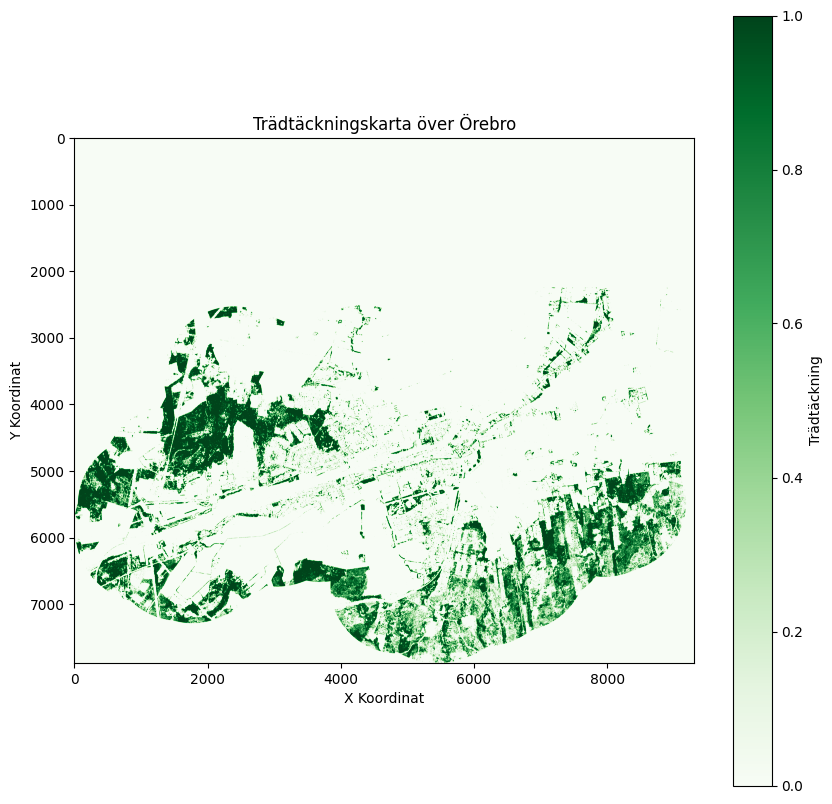

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Ladda in trädtäckningsdata (GeoTIFF) med rasterio
tree_cover_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning_binar3m_Örebro.tif'
with rasterio.open(tree_cover_path) as src:
    tree_cover_array = src.read(1)  # Läs första bandet

# Visa trädtäckningsdatat som en bild
plt.figure(figsize=(10, 10))
plt.imshow(tree_cover_array, cmap='Greens')
plt.colorbar(label='Trädtäckning')
plt.title('Trädtäckningskarta över Örebro')
plt.xlabel('X Koordinat')
plt.ylabel('Y Koordinat')
plt.show()

# Prompten nedan användes för att skapa denna visualisering:
# 1. Importera nödvändiga bibliotek (rasterio och matplotlib.pyplot).
# 2. Ladda in GeoTIFF-filen med trädtäckningsdata med rasterio.open.
# 3. Läs det första bandet från rasterdatat för att få trädtäckningen.
# 4. Använd matplotlib för att skapa en bild av trädtäckningsdatat.
# 5. Ställ in färgschemat till 'Greens' för att representera trädtäckningen.
# 6. Lägg till en färgskala för att tolka trädtäckningsvärden.
# 7. Titel, X- och Y-axel etiketter läggs till för tydlighet.
# 8. Visa visualiseringen.


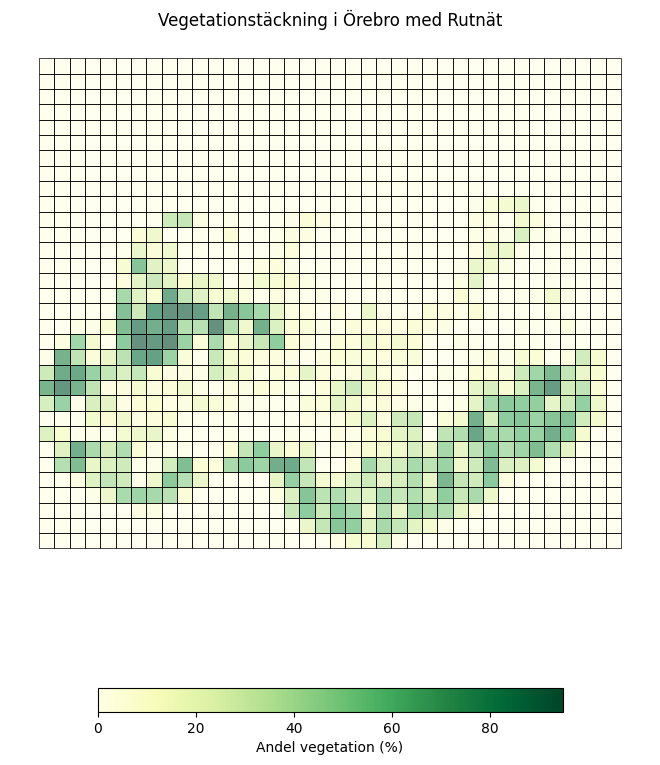

In [9]:
import rasterio
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'

raster = rasterio.open(raster_path)

# Define grid size (250 meters in this case)
grid_size = 250

# Calculate the number of grid cells in x and y directions
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))

# Create grid cells
grid_cells = []
for i in range(num_cells_x):
    for j in range(num_cells_y):
        x1 = raster.bounds.left + i * grid_size
        x2 = raster.bounds.left + (i + 1) * grid_size
        y1 = raster.bounds.top - j * grid_size
        y2 = raster.bounds.top - (j + 1) * grid_size
        grid_cells.append(box(x1, y2, x2, y1))

# Convert to GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Function to calculate vegetation coverage
def calculate_coverage(raster, grid_cell):
    # Read the raster data within the grid cell
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)

    # Calculate percentage of pixels with value 1 (vegetation)
    vegetation_pixels = np.sum(data == 1)
    total_pixels = data.size
    return (vegetation_pixels / total_pixels) * 100 if total_pixels > 0 else 0

# Apply the function to each grid cell
grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Plotting the result with grid lines and adjusted legend
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})
grid_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
ax.set_title('Vegetationstäckning i Örebro med Rutnät')
ax.set_axis_off()

# Save the plot as an image file
output_file_path = 'output_file_path_with_grid.png'  # Replace with your desired file path
fig.savefig(output_file_path, bbox_inches='tight')

# Load the road data and transform to the raster's CRS
roads_path = '/mnt/data/hallsberg_roads.geojson'
roads_gdf = gpd.read_file(roads_path).to_crs(grid_gdf.crs)

# Plotting the result with roads
fig, ax = plt.subplots(figsize=(12, 8))
grid_gdf.plot(column='vegetation_percentage', cmap='Greens', ax=ax, legend=True)
roads_gdf.plot(ax=ax, color='red', linewidth=1)
ax.set_title('Vegetation Coverage in Örebro with Roads')
ax.set_axis_off()
plt.show()

# Instructions to recreate the map:
# 1. Replace 'path_to_your_raster_file.tif' with the path to your raster file.
# 2. If needed, adjust the grid_size variable to change the size of the grid cells.
# 3. Run the script to generate and save the vegetation coverage map.
# 4. The output image will be saved to the path specified in 'output_file_path'.

# "Skapa ett Python-skript för att analysera en rasterfil med vegetationstäckning. Rasterfilen ('tradtackning_binar3m_Örebro.tif') innehåller pixelvärden där 1 representerar vegetation över 3 meter och 0 annars. Skriptet ska göra följande:
# 1. Läsa in rasterfilen.
# 2. Skapa ett rutnät med rutor på 250x250 meter.
# 3. Beräkna för varje ruta i rutnätet den procentuella andelen av pixlar med värdet 1 (vegetation).
# 4. Skapa en tematisk karta som visar dessa procentandelar, där områden med högre andel vegetation visas i mörkare gröna nyanser.
# 5. Spara kartan som en bildfil.
# Inkludera kommentarer i skriptet för varje steg och instruktioner för hur man kör skriptet och anpassar det för andra rasterfiler."



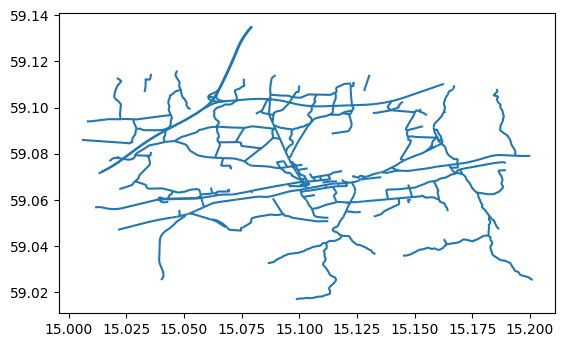

In [18]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# API URL
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"

# Anropa Overpass API
response = requests.get(url)
data = response.json()

# Extrahera noder och vägar
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']

# Skapa geodata
geometries = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))

# Skapa en GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=geometries)

# Skapa en karta
gdf.plot()
plt.show()

# [out:json][timeout:25];
# // Samla större vägar inom det specificerade området
# (
#   way["highway"~"motorway|trunk|primary|secondary|tertiary|unclassified"]
#     (59.038695,15.021816,59.109342,15.184407);  // Använder de omvandlade WGS 84-koordinaterna
# );
# // Skriv ut resultatet
# out body;
# >;
# out skel qt;



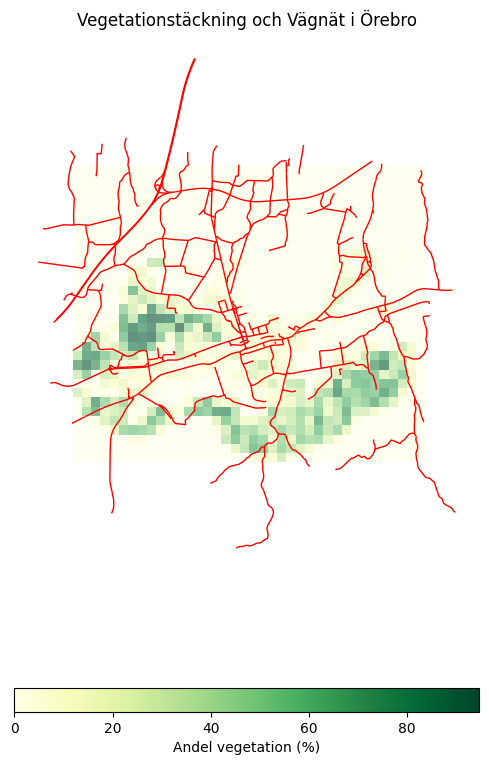

In [19]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, LineString
import requests

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutnät baserat på rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Beräkna vegetationstäckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API för vägdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta vägdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']
geometries = [LineString([nodes[node_id] for node_id in way['nodes']]) for way in ways]
roads_gdf = gpd.GeoDataFrame(geometry=geometries, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Rita upp både vegetation och vägar
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})
roads_gdf.plot(ax=ax, color='red', linewidth=1)

ax.set_title('Vegetationstäckning och Vägnät i Örebro')
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


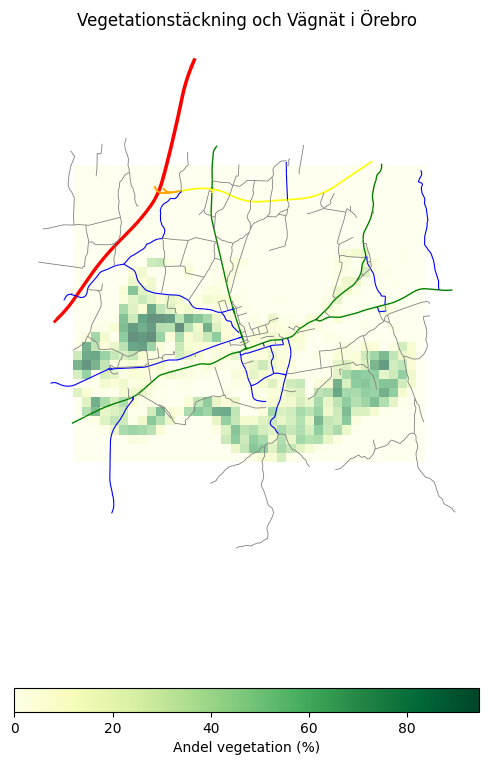

In [20]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, box
import numpy as np
import rasterio

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutnät baserat på rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Beräkna vegetationstäckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API för vägdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta vägdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']

geometries = []
road_types = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))
    road_types.append(way['tags'].get('highway', 'unknown'))

# Skapa en GeoDataFrame
roads_gdf = gpd.GeoDataFrame({'geometry': geometries, 'highway': road_types}, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Rita upp både vegetation och vägar med olika färger och tjocklekar beroende på vägtyp
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})

# Väginställningar
road_colors = {'motorway': 'red', 'trunk': 'orange', 'primary': 'yellow', 'secondary': 'green', 'tertiary': 'blue', 'unclassified': 'grey', 'unknown': 'black'}
road_widths = {'motorway': 2, 'trunk': 1.5, 'primary': 1.2, 'secondary': 1, 'tertiary': 0.8, 'unclassified': 0.6, 'unknown': 0.4}

for road_type in road_colors.keys():
    subset = roads_gdf[roads_gdf['highway'] == road_type]
    subset.plot(ax=ax, color=road_colors[road_type], linewidth=road_widths[road_type])

ax.set_title('Vegetationstäckning och Vägnät i Örebro')
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


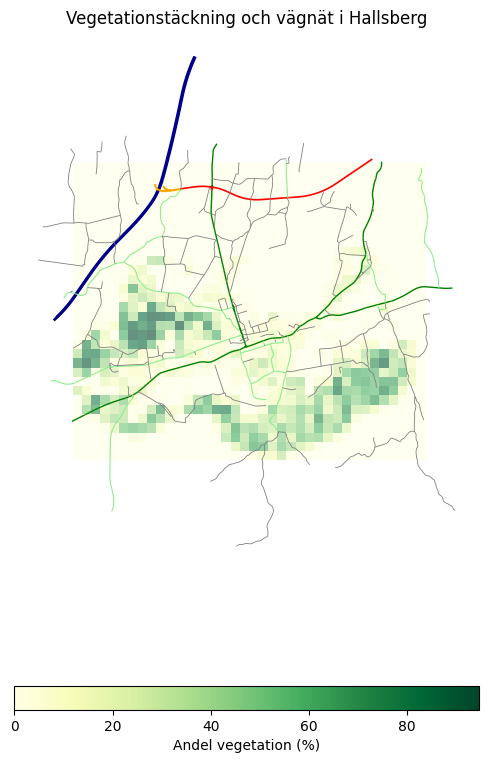

In [23]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, LineString
import requests

# Ladda in trädtäckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_Örebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutnät baserat på rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Beräkna vegetationstäckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API för vägdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta vägdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']
geometries = []
road_types = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))
    road_types.append(way['tags'].get('highway', 'unknown'))

# Skapa en GeoDataFrame för vägarna
roads_gdf = gpd.GeoDataFrame({'geometry': geometries, 'highway': road_types}, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Väginställningar
road_colors = {
    'motorway': 'darkblue',
    'trunk': 'orange',
    'primary': 'red',
    'secondary': 'green',
    'tertiary': 'lightgreen',
    'unclassified': 'grey',
    'unknown': 'black'
}
road_widths = {
    'motorway': 2,
    'trunk': 1.5,
    'primary': 1.2,
    'secondary': 1,
    'tertiary': 0.8,
    'unclassified': 0.6,
    'unknown': 0.4
}

# Rita upp både vegetation och vägar
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})

for road_type in road_colors.keys():
    subset = roads_gdf[roads_gdf['highway'] == road_type]
    subset.plot(ax=ax, color=road_colors[road_type], linewidth=road_widths[road_type])

ax.set_title('Vegetationstäckning och vägnät i Hallsberg')
ax.set_axis_off()
plt.show()


# SMHI

## Hydrologi

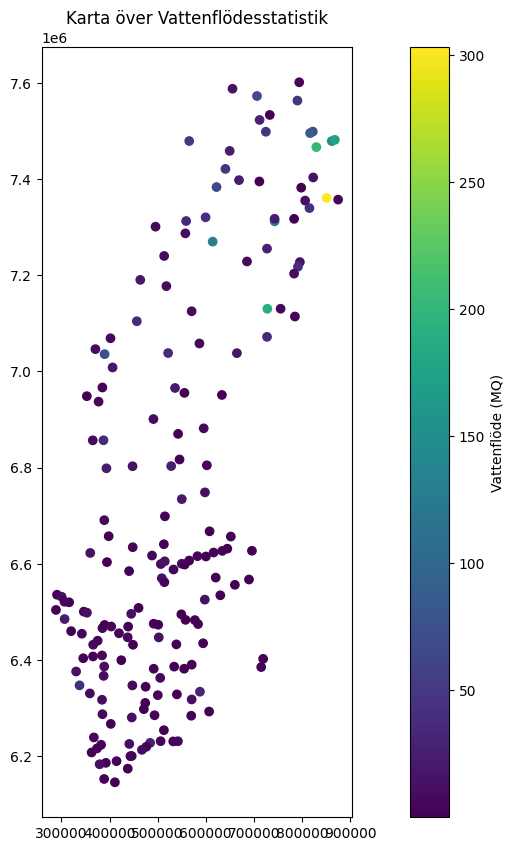

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Läs in Excel-filen med vattenflödesstatistiken
statistik_df = pd.read_excel('https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Statistik_vattenwebb_201604.xls', sheet_name='Statistik')

# Läs in Shapefilen
gdf = gpd.read_file('https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Hyd_grundnat_SMHI_2020.shp')

# Matcha stationerna baserat på stationsnummer
# Antag att 'Stationsnummer' finns både i statistikfilen och Shapefilen
merged_data = gdf.merge(statistik_df, left_on='StationsNr', right_on='Stationsnummer')

# Välj en flödesparameter att visualisera, t.ex. 'MQ'
parameter_to_visualize = 'MQ'

# Kontrollera att vald parameter finns i datamängden
if parameter_to_visualize in merged_data.columns:
    # Skapa en karta
    fig, ax = plt.subplots(figsize=(15, 10))
    merged_data.plot(column=parameter_to_visualize, ax=ax, legend=True,
                     legend_kwds={'label': f"Vattenflöde ({parameter_to_visualize})"},
                     cmap='viridis')
    plt.title('Karta över Vattenflödesstatistik')
    plt.show()
else:
    print(f"Parameter '{parameter_to_visualize}' finns inte i datamängden.")


## Oceanografi

<ipython-input-2-ed4cc65549dc>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';', header=4)
<ipython-input-2-ed4cc65549dc>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_seasonal = data.groupby(['Säsong', 'År']).mean().reset_index()


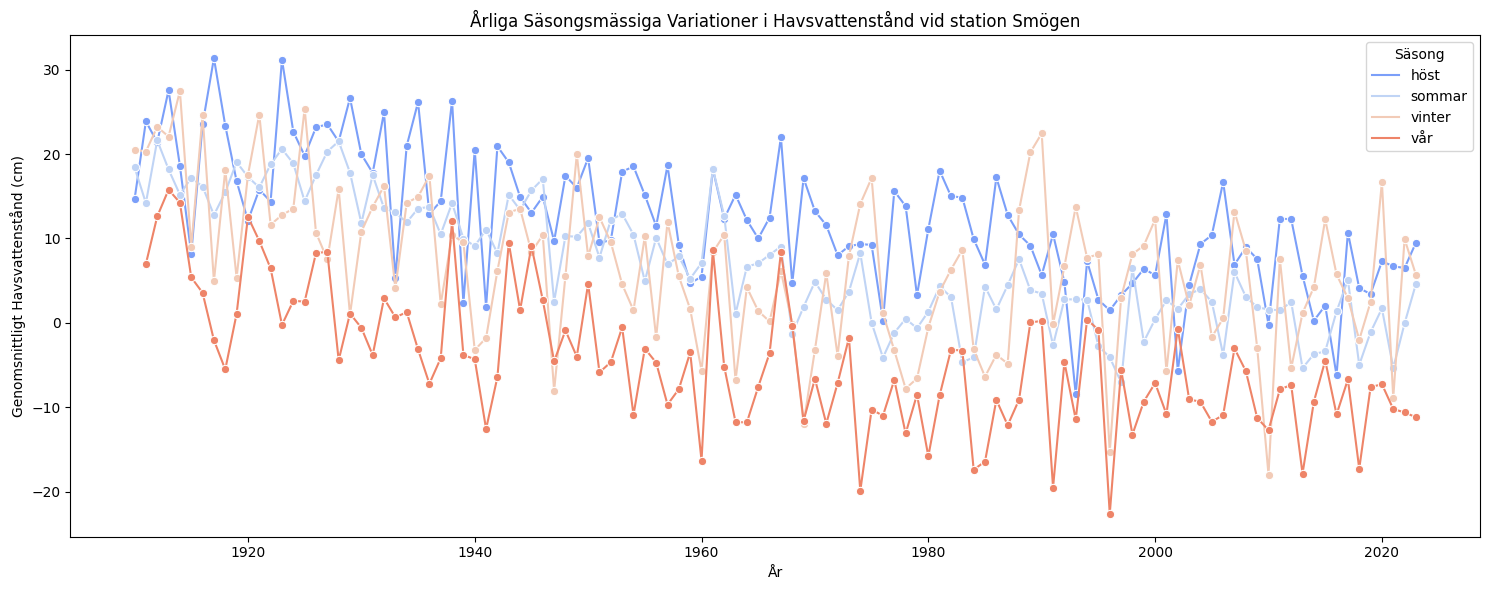

In [ ]:
# https://www.smhi.se/data/oceanografi/ladda-ner-oceanografiska-observationer#param=sealevelrh2000,stations=core,stationid=2111
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laddar in CSV-filen
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/smhi-opendata_6_2111_20231122_152831.csv'
data = pd.read_csv(file_path, sep=';', header=4)

# Konverterar 'Datum Tid (UTC)' till datetime och 'Havsvattenstånd' till numeriska värden
data['Datum Tid (UTC)'] = pd.to_datetime(data['Datum Tid (UTC)'])
data['Havsvattenstånd'] = pd.to_numeric(data['Havsvattenstånd'], errors='coerce')

# Tar bort rader med NaN-värden i 'Havsvattenstånd'
data.dropna(subset=['Havsvattenstånd'], inplace=True)

# Funktion för att tilldela säsong baserat på månad
def assign_season(month):
    if month in [12, 1, 2]:
        return 'vinter'
    elif month in [3, 4, 5]:
        return 'vår'
    elif month in [6, 7, 8]:
        return 'sommar'
    else:
        return 'höst'

# Tillämpar funktionen för att skapa en ny kolumn 'Säsong' baserat på månad
data['Säsong'] = data['Datum Tid (UTC)'].dt.month.apply(assign_season)

# Lägger till kolumner för år och månad för enklare gruppering
data['År'] = data['Datum Tid (UTC)'].dt.year
data['Månad'] = data['Datum Tid (UTC)'].dt.month

# Grupperar data efter säsong och år, och beräknar medelvärdet för varje grupp
data_seasonal = data.groupby(['Säsong', 'År']).mean().reset_index()

# Skapar en tidsserieplot för säsongsmässiga variationer
plt.figure(figsize=(15, 6))
sns.lineplot(data=data_seasonal, x='År', y='Havsvattenstånd', hue='Säsong', palette='coolwarm', marker='o')
plt.title('Årliga Säsongsmässiga Variationer i Havsvattenstånd vid station Smögen')
plt.xlabel('År')
plt.ylabel('Genomsnittligt Havsvattenstånd (cm)')
plt.legend(title='Säsong')
plt.tight_layout()

# Visar plotten
plt.show()
# ChatGPT-4
# https://www.smhi.se/data/oceanografi/ladda-ner-oceanografiska-observationer#param=sealevelrh2000,stations=core,stationid=2111
# Kan du ge mig den exakta prompten till dig som behövs för att du ska kunna återskapa exakt detta diagrem?

# ChatGPT
# För att jag ska kunna återskapa exakt samma diagram som visar de årliga säsongsmässiga variationerna i havsvattenståndet vid station Smögen, kan du använda följande prompt:

# "Använd den bifogade CSV-filen med havsvattenståndsdata från station Smögen för att skapa ett diagram. Rensa och förbered datan genom att konvertera 'Datum Tid (UTC)' till datetime och 'Havsvattenstånd' till numeriska värden.
# Kategorisera sedan varje datapunkt i en säsong baserat på månaden och beräkna genomsnittliga havsvattenståndet för varje säsong och år.
# Skapa ett linjediagram som visar dessa genomsnittliga havsvattenstånd över åren, där varje säsong representeras med en unik färg och markerad med punkter.
# Titeln på diagrammet ska vara 'Årliga Säsongsmässiga Variationer i Havsvattenstånd vid station Smögen'."

# Se till att också bifoga CSV-filen med havsvattenståndsdata från station Smögen när du använder denna prompt, eftersom datan är nödvändig för att skapa diagrammet.
